### This file includes three regressions' results (excludes linear regression, which is in a separate file.

In [5]:
# Various import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import graphviz 
import numpy as np
from sklearn.tree import DecisionTreeRegressor, export_text
import graphviz  
from sklearn.tree import export_graphviz
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import GradientBoostingRegressor

In [6]:
# Import dataset, convert round to wins, and engineer Seed squared
df = pd.read_csv("Datasets/KenPom Barttorvik.csv")
df['WINS'] = (df.ROUND==32) + 2*(df.ROUND==16)+ 3*(df.ROUND==8) + 4*(df.ROUND==4)+5*(df.ROUND==2)+6*(df.ROUND==1)
df['SEED2'] = df['SEED']**2
pd.set_option('display.max_rows', 100)
df

,YEAR,CONF,CONF ID,QUAD NO,QUAD ID,TEAM NO,TEAM ID,TEAM,SEED,ROUND,...,EFF HGT RANK,EXP RANK,TALENT RANK,FT% RANK,OP FT% RANK,PPPO RANK,PPPD RANK,ELITE SOS RANK,WINS,SEED2
0,2024,MAC,17,61,1,1079,2,Akron,14,64,...,199,19,176,164,47,122,51,249,0,196
1,2024,SEC,28,63,3,1078,3,Alabama,4,4,...,8,156,106,10,314,2,263,7,4,16
2,2024,P12,24,63,3,1077,8,Arizona,2,16,...,37,196,7,195,134,8,14,47,2,4
3,2024,SEC,28,64,4,1076,12,Auburn,4,64,...,76,127,69,59,284,12,8,69,0,16
4,2024,B12,7,63,3,1075,14,Baylor,3,32,...,22,304,34,97,254,15,155,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,2008,BE,8,1,1,5,235,West Virginia,7,16,...,115,181,61,209,16,22,32,49,2,49
1075,2008,SB,26,1,1,4,236,Western Kentucky,12,16,...,179,55,131,127,214,27,28,203,2,144
1076,2008,BSth,10,4,4,3,239,Winthrop,13,64,...,206,89,236,339,190,170,12,179,0,169
1077,2008,B10,6,3,3,2,240,Wisconsin,3,16,...,35,98,12,118,117,60,2,57,2,9


In [7]:
# Get shape
df.shape

(1079, 105)

In [8]:
# Train set is 2008 through 2023
# Test set is 2024
# Exclude "Round 68" observations since these happened before tournament
df_train = df[df['YEAR'] != 2024]
df_train = df_train[df_train['ROUND'] != 68]
df_test = df[df['YEAR'] == 2024]
df_test = df_test[df_test['ROUND'] != 68]

In [9]:
# Drop heavily-correlated features and set target = WINS
X_train = df_train.drop(['TEAM', 'CONF','CONF ID','QUAD NO', 'QUAD ID','TEAM NO','TEAM ID','ROUND','YEAR','ROUND', 'WINS'], axis=1)
y_train = df_train['WINS']
X_test = df_test.drop(['TEAM', 'CONF','CONF ID','QUAD NO', 'QUAD ID','TEAM NO','TEAM ID','ROUND','YEAR','ROUND', 'WINS'], axis=1)  
y_test = df_test['WINS']

In [6]:
# Verify columns
X_train.columns

Index(['SEED', 'K TEMPO', 'K TEMPO RANK', 'KADJ T', 'KADJ T RANK', 'K OFF',
       'KO RANK', 'KADJ O', 'KADJ O RANK', 'K DEF', 'KD RANK', 'KADJ D',
       'KADJ D RANK', 'KADJ EM', 'KADJ EM RANK', 'BADJ EM', 'BADJ O', 'BADJ D',
       'BARTHAG', 'GAMES', 'W', 'L', 'WIN%', 'EFG%', 'EFG%D', 'FTR', 'FTRD',
       'TOV%', 'TOV%D', 'OREB%', 'DREB%', 'OP OREB%', 'OP DREB%', 'RAW T',
       '2PT%', '2PT%D', '3PT%', '3PT%D', 'BLK%', 'BLKED%', 'AST%', 'OP AST%',
       '2PTR', '3PTR', '2PTRD', '3PTRD', 'BADJ T', 'AVG HGT', 'EFF HGT', 'EXP',
       'TALENT', 'FT%', 'OP FT%', 'PPPO', 'PPPD', 'ELITE SOS', 'WAB',
       'BADJ EM RANK', 'BADJ O RANK', 'BADJ D RANK', 'BARTHAG RANK',
       'EFG% RANK', 'EFGD% RANK', 'FTR RANK', 'FTRD RANK', 'TOV% RANK',
       'TOV%D RANK', 'OREB% RANK', 'DREB% RANK', 'OP OREB% RANK',
       'OP DREB% RANK', 'RAW T RANK', '2PT% RANK', '2PT%D RANK', '3PT% RANK',
       '3PT%D RANK', 'BLK% RANK', 'BLKED% RANK', 'AST% RANK', 'OP AST% RANK',
       '2PTR RANK', '3PTR RA

In [7]:
# Grid search for decision tree gives optimal depth = 2
# grid = {'max_depth':np.arange(1,10)}
# dtree = DecisionTreeRegressor()
# treeCV = GridSearchCV(dtree,param_grid=grid,return_train_score=True)
# treeCV.fit(X_train,y_train)
# print('best tree depth =',treeCV.best_params_, '  valid error rate =', (1 - treeCV.best_score_).round(3))

In [8]:
# Get optimal tree and evaluate
dtree = DecisionTreeRegressor(max_depth=2)
dtree.fit(X_train,y_train)
dtree.score(X_train,y_train)

0.3898106504707102

In [9]:
dtree.score(X_test,y_test)

0.4055481228118516

In [10]:
# Predict and sort by MSE and predicted wins
yh_test = dtree.predict(X_test)
predictions_df = pd.DataFrame({'TEAM':df_test['TEAM'],'Target':y_test, 'Predicted':yh_test})
predictions_df

,TEAM,Target,Predicted
0,Akron,0,0.154167
1,Alabama,4,0.748401
2,Arizona,2,1.942857
3,Auburn,0,1.942857
4,Baylor,1,1.942857
6,BYU,0,0.748401
7,Clemson,3,0.748401
8,Colgate,0,0.154167
9,College of Charleston,0,0.154167
10,Colorado,1,0.748401


In [11]:
predictions_df['MSE'] = (predictions_df['Target']-predictions_df['Predicted'])**2
predictions_df.sort_values(by='MSE')

,TEAM,Target,Predicted,MSE
41,North Carolina,2,1.942857,0.003265
2,Arizona,2,1.942857,0.003265
32,Marquette,2,1.942857,0.003265
26,Iowa St.,2,1.942857,0.003265
0,Akron,0,0.154167,0.023767
31,Longwood,0,0.154167,0.023767
30,Long Beach St.,0,0.154167,0.023767
48,Saint Peter's,0,0.154167,0.023767
21,Grambling St.,0,0.154167,0.023767
49,Samford,0,0.154167,0.023767


In [12]:
predictions_df.sort_values(by='Predicted',ascending=False)

,TEAM,Target,Predicted,MSE
46,Purdue,5,3.634146,1.865556
12,Connecticut,6,3.634146,5.597264
23,Houston,2,3.634146,2.670434
55,Tennessee,3,1.942857,1.117551
26,Iowa St.,2,1.942857,0.003265
32,Marquette,2,1.942857,0.003265
25,Illinois,3,1.942857,1.117551
51,South Carolina,0,1.942857,3.774694
4,Baylor,1,1.942857,0.888980
3,Auburn,0,1.942857,3.774694


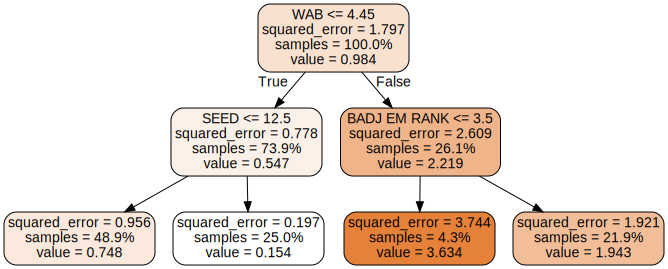

In [13]:
# Visualize tree
dot_data = export_graphviz(dtree,
                           out_file=None,
                           feature_names=X_train.columns,
                           proportion=True,
                           impurity=True,
                           filled=True,
                           rounded=True)
graph = graphviz.Source(dot_data)
graph

In [14]:
# Obtain importances
importances = pd.Series(dtree.feature_importances_,index = X_train.columns)
importances.sort_values(ascending=False)

WAB               0.770676
BADJ EM RANK      0.145942
SEED              0.083381
EFG% RANK         0.000000
OP OREB% RANK     0.000000
DREB% RANK        0.000000
OREB% RANK        0.000000
TOV%D RANK        0.000000
TOV% RANK         0.000000
FTRD RANK         0.000000
FTR RANK          0.000000
EFGD% RANK        0.000000
BADJ D RANK       0.000000
BARTHAG RANK      0.000000
RAW T RANK        0.000000
BADJ O RANK       0.000000
ELITE SOS         0.000000
PPPD              0.000000
PPPO              0.000000
OP FT%            0.000000
FT%               0.000000
TALENT            0.000000
OP DREB% RANK     0.000000
2PT% RANK         0.000000
EFF HGT           0.000000
BADJT RANK        0.000000
ELITE SOS RANK    0.000000
PPPD RANK         0.000000
PPPO RANK         0.000000
OP FT% RANK       0.000000
FT% RANK          0.000000
TALENT RANK       0.000000
EXP RANK          0.000000
EFF HGT RANK      0.000000
AVG HGT RANK      0.000000
3PTRD RANK        0.000000
2PT%D RANK        0.000000
2

In [20]:
# Grid search for RFR for paper
grid = {'max_depth':[1,2,3,4],'n_estimators':[100]}
rfr = RandomForestRegressor()
rfrCV = GridSearchCV(rfr,param_grid=grid,n_jobs=-1, return_train_score=True)
rfrCV.fit(X_train,y_train)
print('Random Forest Regressor:')
print(' Optimal Parameters:',rfrCV.best_params_)
print(' Optimal Valid R2 =',rfrCV.best_score_)

Random Forest Regressor:
 Optimal Parameters: {'max_depth': 2, 'n_estimators': 100}
 Optimal Valid R2 = 0.3774046101100416


<Axes: xlabel='max_depth'>

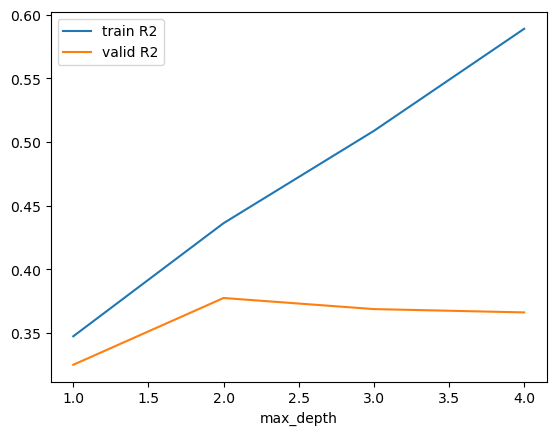

In [21]:
#Store results in DataFrame
results = pd.DataFrame()
results['max_depth'] = grid['max_depth']
results['train R2'] = rfrCV.cv_results_['mean_train_score']
results['valid R2'] = rfrCV.cv_results_['mean_test_score']
results.head(3)
#Plot train and valiation R-squared.
ax1 = results.plot.line(x = 'max_depth', y = 'train R2')
results.plot.line(x = 'max_depth', y = 'valid R2', ax = ax1)

In [16]:
# Get optimal model and evaluate
rfr = RandomForestRegressor(max_depth=2, n_estimators=100)
rfr.fit(X_train,y_train)
print(rfr.score(X_train, y_train))
rfr.score(X_test, y_test)

0.42282500906438913


0.41334797434370585

In [17]:
# Predict and sort
yh_test = rfr.predict(X_test)
predictions_df = pd.DataFrame({'TEAM':df_test['TEAM'],'Target':y_test, 'Predicted':yh_test})
predictions_df

,TEAM,Target,Predicted
0,Akron,0,0.243201
1,Alabama,4,0.931424
2,Arizona,2,2.136211
3,Auburn,0,2.480669
4,Baylor,1,1.722152
6,BYU,0,0.783211
7,Clemson,3,0.792435
8,Colgate,0,0.243201
9,College of Charleston,0,0.243201
10,Colorado,1,0.735836


In [18]:
predictions_df['MSE'] = (predictions_df['Target']-predictions_df['Predicted'])**2
predictions_df.sort_values(by='MSE')

,TEAM,Target,Predicted,MSE
28,Kansas,1,0.982240,0.000315
32,Marquette,2,1.944616,0.003067
41,North Carolina,2,1.926115,0.005459
2,Arizona,2,2.136211,0.018553
34,Michigan St.,1,0.815455,0.034057
56,Texas,1,0.813013,0.034964
57,Texas A&M,1,0.777355,0.049571
31,Longwood,0,0.243201,0.059147
37,Morehead St.,0,0.243201,0.059147
48,Saint Peter's,0,0.243201,0.059147


In [19]:
predictions_df.sort_values(by='Predicted',ascending=False)

,TEAM,Target,Predicted,MSE
12,Connecticut,6,3.676033,5.400824
23,Houston,2,3.633291,2.667639
46,Purdue,5,3.601205,1.956627
3,Auburn,0,2.480669,6.153719
26,Iowa St.,2,2.359984,0.129589
2,Arizona,2,2.136211,0.018553
25,Illinois,3,1.948995,1.104611
55,Tennessee,3,1.948041,1.106617
32,Marquette,2,1.944616,0.003067
41,North Carolina,2,1.926115,0.005459


In [20]:
# Obtain importances
importances = pd.Series(rfr.feature_importances_,index = X_train.columns)
importances.sort_values(ascending=False)

WAB               0.581936
BADJ EM RANK      0.081090
BARTHAG           0.062477
BADJ EM           0.049385
KADJ EM           0.046656
KADJ EM RANK      0.044239
SEED2             0.038812
SEED              0.033834
BARTHAG RANK      0.026389
TALENT RANK       0.011996
ELITE SOS         0.007525
TALENT            0.004645
OREB%             0.003665
BADJ O            0.001626
W                 0.001369
KADJ O            0.001091
DREB%             0.000987
OP DREB%          0.000883
RAW T RANK        0.000810
BADJ D            0.000585
FTRD RANK         0.000000
OP DREB% RANK     0.000000
OP OREB% RANK     0.000000
DREB% RANK        0.000000
OREB% RANK        0.000000
TOV%D RANK        0.000000
TOV% RANK         0.000000
FTR RANK          0.000000
EXP RANK          0.000000
EFGD% RANK        0.000000
EFG% RANK         0.000000
PPPD RANK         0.000000
ELITE SOS RANK    0.000000
BADJ D RANK       0.000000
BADJ O RANK       0.000000
K TEMPO RANK      0.000000
2PT% RANK         0.000000
2

In [22]:
# Grid search for GBT
# grid = {'learning_rate':[0.01],'n_estimators':[500],'max_depth':[4, 10]}
# gbt = GradientBoostingRegressor()
# gbtCV = GridSearchCV(gbt,param_grid=grid,n_jobs=-1)
# gbtCV.fit(X_train, y_train)
# print('Gradient Boosting Trees:')
# print(' Optimal Parameters:',gbtCV.best_params_)
# print(' Optimal Valid R2 =',gbtCV.best_score_)

In [ ]:
ax1 = results.plot.line(x = 'neighbors', y = 'train R2')
results.plot.line(x = 'neighbors', y = 'valid R2', ax = ax1)

In [20]:
# Obtain best model
gbt = GradientBoostingRegressor(max_depth=4, n_estimators=500, learning_rate=0.01)
gbt.fit(X_train,y_train)
print(gbt.score(X_train, y_train))
gbt.score(X_test, y_test)

0.7840936738371154


0.48650036092680804

In [23]:
# grid = {'learning_rate':[0.01],'n_estimators':[500],'max_depth':[4]}
# gbt = GradientBoostingRegressor()
# gbtCV = GridSearchCV(gbt,param_grid=grid,n_jobs=-1)
# gbtCV.fit(X_train, y_train)
# print('Gradient Boosting Trees:')
# print(' Optimal Parameters:',gbtCV.best_params_)
# print(' Optimal Valid R2 =',gbtCV.best_score_)
# Gradient Boosting Trees:
#  Optimal Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}
#  Optimal Valid R2 = 0.33526049806570934

In [23]:
# Predict & evaluate
yh_test = gbt.predict(X_test)
predictions_df = pd.DataFrame({'TEAM':df_test['TEAM'],'Target':y_test, 'Predicted':yh_test, 'Seed': X_test.SEED})
predictions_df

,TEAM,Target,Predicted,Seed
0,Akron,0,0.162871,14
1,Alabama,4,0.864601,4
2,Arizona,2,2.805138,2
3,Auburn,0,2.451697,4
4,Baylor,1,1.261176,3
6,BYU,0,0.380584,6
7,Clemson,3,1.177868,6
8,Colgate,0,0.296597,14
9,College of Charleston,0,0.303375,13
10,Colorado,1,0.558404,10


In [25]:
# Sort predictions
predictions_df['MSE'] = (predictions_df['Target']-predictions_df['Predicted'])**2
predictions_df.sort_values(by='MSE')

,TEAM,Target,Predicted,Seed,MSE
45,Oregon,1,1.015534,11,0.000241
41,North Carolina,2,2.044335,1,0.001966
21,Grambling St.,0,0.055515,16,0.003082
31,Longwood,0,0.069879,16,0.004883
26,Iowa St.,2,2.081669,2,0.006670
52,South Dakota St.,0,0.083862,15,0.007033
57,Texas A&M,1,1.088752,9,0.007877
30,Long Beach St.,0,0.121549,15,0.014774
34,Michigan St.,1,1.137516,9,0.018911
65,Western Kentucky,0,0.152617,15,0.023292


In [22]:
predictions_df.sort_values(by='Predicted',ascending=False)

,TEAM,Target,Predicted,Seed
12,Connecticut,6,4.422485,1
46,Purdue,5,3.425617,1
23,Houston,2,3.328475,1
2,Arizona,2,2.805138,2
3,Auburn,0,2.451697,4
26,Iowa St.,2,2.081669,2
41,North Carolina,2,2.067116,1
25,Illinois,3,2.061189,3
55,Tennessee,3,1.920784,2
29,Kentucky,0,1.834189,3


In [27]:
# Obtain importances
importances = pd.Series(gbt.feature_importances_,index = X_train.columns)
importances.sort_values(ascending=False)

WAB               0.245154
BARTHAG           0.118203
BADJ EM RANK      0.036726
SEED2             0.033035
SEED              0.030537
TALENT RANK       0.029626
KADJ EM           0.025307
KADJ EM RANK      0.023168
BADJ EM           0.020092
TALENT            0.019847
FTR RANK          0.016439
FT% RANK          0.016420
KADJ D            0.016148
OP AST%           0.016075
2PT%D RANK        0.015801
FTR               0.013458
FTRD RANK         0.012796
AST%              0.012350
2PT%D             0.009708
OP DREB% RANK     0.008743
ELITE SOS RANK    0.008640
ELITE SOS         0.008618
FTRD              0.007803
EXP RANK          0.007701
OREB% RANK        0.007326
3PT%D RANK        0.007293
W                 0.007238
AST% RANK         0.007143
KADJ T            0.007102
OP DREB%          0.007017
TOV%D RANK        0.006570
3PT%D             0.006395
GAMES             0.006204
EXP               0.005961
BADJ D RANK       0.005905
BLKED% RANK       0.005828
EFG% RANK         0.005485
E

In [11]:
# y and yh are 2 numpy arrays.
def MAE(y,yh):
    # TODO: Complete this, replacing the "pass" placeholder.
    return (1/len(y))*(abs(y-yh).sum())
    
def MSE(y,yh):
    # TODO: Complete this.
    return (1/len(y))*((y-yh)**2).sum()

In [12]:
def SimpleBiasRegressor(b,n):
    return np.ones(n)*b # TODO: replace this.

Text(0, 0.5, 'B vs. MSE and MAE')

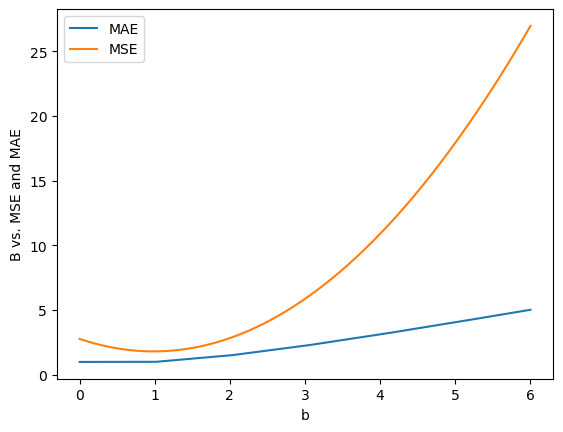

In [13]:
y = pd.concat([df_train['WINS'],df_test['WINS']],axis=0)

B = np.linspace(y.min(), y.max(), num = 10000)
mae = []
mse = []
for bias in B:
    mae.append(MAE(y, SimpleBiasRegressor(bias, len(y))))
    mse.append(MSE(y, SimpleBiasRegressor(bias, len(y))))

results = pd.DataFrame()
results['b'] = B
results['MAE'] = mae
results['MSE'] = mse

# TODO: plot the results
ax1 = results.plot.line(x='b',y='MAE')
results.plot.line(x='b',y='MSE',ax=ax1)
plt.ylabel('B vs. MSE and MAE')

In [18]:
results.iloc[results['MSE'].idxmin()]

b      0.984098
MAE    0.984375
MSE    1.796631
Name: 1640, dtype: float64

In [15]:
y.mean()

0.984375

In [16]:
y.value_counts()

WINS
0    512
1    256
2    128
3     64
4     32
6     16
5     16
Name: count, dtype: int64

In [25]:
yh = SimpleBiasRegressor(0.984098,64)

In [24]:
yh_test

array([0.1628709 , 0.86460103, 2.80513833, 2.45169716, 1.26117642,
       0.38058381, 1.17786805, 0.29659695, 0.30337474, 0.55840401,
       0.50172898, 4.42248533, 1.69801159, 1.17198667, 0.81617135,
       1.43602823, 0.4820971 , 0.45151994, 0.32140225, 1.33702687,
       0.05551549, 0.77255323, 3.32847477, 2.06118903, 2.08166872,
       0.437016  , 0.37043298, 1.83418908, 0.12154943, 0.06987867,
       1.78845883, 0.31526999, 1.13751576, 1.11930174, 0.18337439,
       0.626626  , 0.57099259, 0.99431287, 2.0671164 , 0.87694982,
       0.69825183, 0.22799043, 1.0155337 , 3.42561703, 1.12930305,
       0.27837022, 0.21511922, 0.93824679, 1.23568338, 0.09483796,
       0.1551835 , 0.75048746, 1.92078401, 0.75634035, 1.12098653,
       0.7855624 , 0.23029484, 0.78556461, 0.2411903 , 0.25946359,
       0.61376379, 0.15261665, 1.16370025, 0.30041779])

In [26]:
yh

array([0.984098, 0.984098, 0.984098, 0.984098, 0.984098, 0.984098,
       0.984098, 0.984098, 0.984098, 0.984098, 0.984098, 0.984098,
       0.984098, 0.984098, 0.984098, 0.984098, 0.984098, 0.984098,
       0.984098, 0.984098, 0.984098, 0.984098, 0.984098, 0.984098,
       0.984098, 0.984098, 0.984098, 0.984098, 0.984098, 0.984098,
       0.984098, 0.984098, 0.984098, 0.984098, 0.984098, 0.984098,
       0.984098, 0.984098, 0.984098, 0.984098, 0.984098, 0.984098,
       0.984098, 0.984098, 0.984098, 0.984098, 0.984098, 0.984098,
       0.984098, 0.984098, 0.984098, 0.984098, 0.984098, 0.984098,
       0.984098, 0.984098, 0.984098, 0.984098, 0.984098, 0.984098,
       0.984098, 0.984098, 0.984098, 0.984098])

In [30]:
MSE(y_test, yh)

1.7966309361039998

In [31]:
MSE(y_test, yh_test)

0.9225692978368212

In [32]:
1-0.9225692978368212/1.7966309361039998

0.4865003828569179

In [36]:
yh_test_scaled = yh_test * (6 / 4.42248533)

In [39]:
X_test

,SEED,K TEMPO,K TEMPO RANK,KADJ T,KADJ T RANK,K OFF,KO RANK,KADJ O,KADJ O RANK,K DEF,...,AVG HGT RANK,EFF HGT RANK,EXP RANK,TALENT RANK,FT% RANK,OP FT% RANK,PPPO RANK,PPPD RANK,ELITE SOS RANK,SEED2
0,14,66.7747,274,65.8933,268,107.8410,122,107.0090,162,99.7096,...,238,199,19,176,164,47,122,51,249,196
1,4,74.1625,7,72.6461,9,121.7120,2,125.6010,2,108.0310,...,33,8,156,106,10,314,2,263,7,16
2,2,73.3760,11,71.8379,16,117.6530,10,121.1250,8,96.9086,...,50,37,196,7,195,134,8,14,47,4
3,4,70.9629,54,69.7887,58,117.3640,14,120.5790,10,95.7924,...,86,76,127,69,59,284,12,8,69,16
4,3,66.8428,270,65.6032,281,117.2620,15,122.4900,6,104.1660,...,31,22,304,34,97,254,15,155,1,9
6,6,70.0246,90,69.0581,85,116.9260,16,120.4860,11,99.9495,...,18,54,116,133,103,62,16,52,39,36
7,6,67.5823,233,66.1056,260,113.6350,29,117.4260,27,104.7810,...,28,32,99,18,8,318,29,178,62,36
8,14,66.1152,302,66.2225,253,106.3560,151,104.6500,211,96.8562,...,60,48,214,362,315,5,156,16,268,196
9,13,69.7286,100,69.7757,59,114.4210,23,113.7360,58,104.1970,...,117,59,256,227,177,102,24,160,271,169
10,10,69.0823,137,67.5085,165,113.5280,30,117.5790,25,101.9080,...,11,29,125,74,18,112,31,94,80,100


In [40]:
df_test

,YEAR,CONF,CONF ID,QUAD NO,QUAD ID,TEAM NO,TEAM ID,TEAM,SEED,ROUND,...,EFF HGT RANK,EXP RANK,TALENT RANK,FT% RANK,OP FT% RANK,PPPO RANK,PPPD RANK,ELITE SOS RANK,WINS,SEED2
0,2024,MAC,17,61,1,1079,2,Akron,14,64,...,199,19,176,164,47,122,51,249,0,196
1,2024,SEC,28,63,3,1078,3,Alabama,4,4,...,8,156,106,10,314,2,263,7,4,16
2,2024,P12,24,63,3,1077,8,Arizona,2,16,...,37,196,7,195,134,8,14,47,2,4
3,2024,SEC,28,64,4,1076,12,Auburn,4,64,...,76,127,69,59,284,12,8,69,0,16
4,2024,B12,7,63,3,1075,14,Baylor,3,32,...,22,304,34,97,254,15,155,1,1,9
6,2024,B12,7,64,4,1073,25,BYU,6,64,...,54,116,133,103,62,16,52,39,0,36
7,2024,ACC,2,63,3,1072,33,Clemson,6,8,...,32,99,18,8,318,29,178,62,3,36
8,2024,Pat,25,63,3,1071,36,Colgate,14,64,...,48,214,362,315,5,156,16,268,0,196
9,2024,CAA,12,63,3,1070,37,College of Charleston,13,64,...,59,256,227,177,102,24,160,271,0,169
10,2024,P12,24,62,2,1069,38,Colorado,10,32,...,29,125,74,18,112,31,94,80,1,100


In [46]:
yh_seed_only = [0, 2, 3, 2, 2, 1, 1, 0, 0, 0, 0, 6, 2, 1, 0, 2, 0, 1, 1, 1, 0, 0, 4, 2, 3, 0, 2, 2, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 4, 0, 0, 0, 0, 5, 1, 0, 0, 1, 1, 0, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]

In [47]:
MSE(yh_seed_only, y_test)

1.0625

In [48]:
1 - 1.0625/1.7966309361039998

0.40861532624834196